In [2]:
# ==============================================================================
# Import modules
# ==============================================================================

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# ==============================================================================
# Load data and select features
# ==============================================================================

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [4]:
# ==============================================================================
# Split into training and test data
# ==============================================================================

# Print lables of all classes in data set
print("Class labels:", np.unique(y))


# Split data into training and test data (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


# Show distribution of classes in input data, training data and test data
print(f"Labels counts in y: {np.bincount(y)}")
print(f"Labels counts in y_train: {np.bincount(y_train)}")
print(f"Labels counts in y_test: {np.bincount(y_test)}")


# Show distribution of classes in input data, training data and test data
# Alternative 2
unique, counts = np.unique(y, return_counts=True)
print("Labels counts in y:", unique, counts)

unique, counts = np.unique(y_train, return_counts=True)
print("Labels counts in y_train:", unique, counts)

unique, counts = np.unique(y_test, return_counts=True)
print("Labels counts in y_test:", unique, counts)

Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]
Labels counts in y: [0 1 2] [50 50 50]
Labels counts in y_train: [0 1 2] [35 35 35]
Labels counts in y_test: [0 1 2] [15 15 15]


In [5]:
# ==============================================================================
# Scale features using StandardScaler class in scikit-learn
# ==============================================================================

# Initialise standard scaler and compute mean and stddev from training data
sc = StandardScaler()
sc.fit(X_train)

# Transform (standardise) both X_train and X_test with mean and stddev from
# training data
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

print("Mean of X_train_sc:", np.mean(X_train_sc, axis=0))
print("Stddev of X_train_sc:", np.std(X_train_sc, axis=0))

Mean of X_train_sc: [5.70971841e-17 7.19001578e-17]
Stddev of X_train_sc: [1. 1.]


In [6]:
# ==============================================================================
# Train a multiclass perceptron using scikit-learn
# ==============================================================================

# Initialise the model
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_sc, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [7]:
# ==============================================================================
# Make predictions for the test set
# ==============================================================================

# Predict classes for samples in test set and print number of misclassfications
y_pred = ppn.predict(X_test_sc)
print("Misclassified samples: {0}".format((y_test != y_pred).sum()))

Misclassified samples: 1


In [8]:
# ==============================================================================
# Compute performance metrics
# ==============================================================================

# Print accuracy computed from predictions on the test set
print("Accuracy: {0:.2f}".format(accuracy_score(y_test, y_pred)))


# Print accuracy computed from predictions on the test set
print("Accuracy: {0:.2f}".format(ppn.score(X_test_sc, y_test)))

Accuracy: 0.98
Accuracy: 0.98


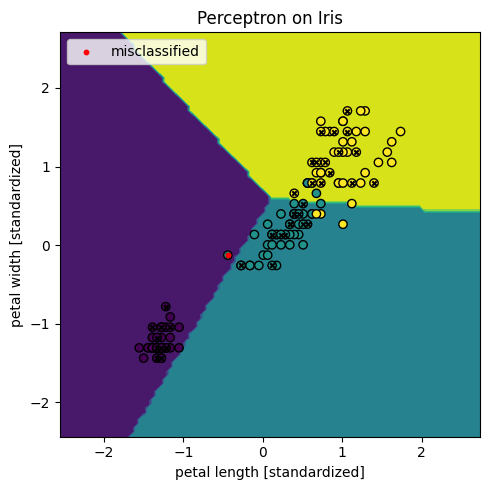

In [9]:
# ==============================================================================
# Plot results with plot function for decision regions using scikit-learn
# ==============================================================================

X_combined_sc = np.vstack((X_train_sc, X_test_sc))
y_combined = np.hstack((y_train, y_test))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

plot = DecisionBoundaryDisplay.from_estimator(
    estimator=ppn,
    X=X_combined_sc,
    alpha=1.0,
    ax=ax,
    response_method="predict",
    xlabel="petal length [standardized]",
    ylabel="petal width [standardized]",
)

plot.ax_.scatter(X_combined_sc[:, 0], X_combined_sc[:, 1], c=y_combined, marker="o", edgecolor="k")

# Highlight test samples
plot.ax_.scatter(
    X_test_sc[:, 0],
    X_test_sc[:, 1],
    marker="x",
    s=10,
    c="k",
)

# Highlight misclassified test samples
plot.ax_.scatter(
    X_test_sc[y_test != y_pred, 0],
    X_test_sc[y_test != y_pred, 1],
    marker="o",
    s=10,
    c="r",
    facecolors="none",
    label="misclassified",
)

plt.legend(loc="upper left")
plt.title("Perceptron on Iris")
plt.tight_layout()
plt.show()